In [9]:
import numpy as np

def spiral_data(samples=100, classes=3):
#     N = samples # number of points per class
#     D = 2 # dimensionality
#     K = classes # number of classes

    X = np.zeros((samples*classes,2)) # data matrix (each row = single example)
    y = np.zeros(samples*classes, dtype='uint8') # class labels
    
    for j in range(classes):
      ix = range(samples * j, samples * (j + 1))
      r = np.linspace(0.0, 1, samples) # radius
      t = np.linspace(j*4, (j + 1) * 4, samples) + np.random.randn(samples) * 0.2 # theta
      X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
      y[ix] = j
    
    # lets visualize the data:
    # plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    # plt.show()
    return X, y

X, y = spiral_data(samples = 100, classes = 3)
X.shape, y.shape

((300, 2), (300,))

In [12]:
class LayerDense:
    def __init__(self, inputs_n, nodes_n):
        self.weights = np.random.randn(inputs_n, nodes_n)
        self.baises = np.zeros((1,nodes_n))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.baises
class ActivationRelu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
class ActivationSoftmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs)
        p = exp_values / np.sum(exp_values)
        self.output = p
class Loss:
    def calculate(self, y, t):
        sample_losses = self.forward(y, t)
        data_loss = np.mean(sample_losses)
        return data_loss
class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y, t):
        samples = len(y)
        y2 = np.clip(y, 1e-7, 1-1e-7)
        return -np.sum(t*np.log(y2))
    
## x 입력할 값, y는 실제 값
# softmax 함수로 hiden layer을 바로 하나로 출력하게끔
# 실제 y 와 출력층에서 나온 y' 와 비교해야 함 => 진짜 같은지?
# 이럴 때 필요한게 LOSS 함수임 => 비교 값이 
# Loss_CategoricalCrossEntropy 로 맞는지 확인-> 0에 가까울 수록 정확함
# 나중엔 learning rate로 weight값을 조절해 학습을 반복시킴
# 

In [13]:
y2 = np.eye(3)[y]
X.shape, y2.shape


((300, 2), (300, 3))

In [16]:
dense1 = LayerDense(2,3) #하나의 300개짜리가 2개가 있음(입력층)-은닉층(3개)
activation1 = ActivationRelu()
activation2 = ActivationSoftmax()
dense1.forward(X)
activation1.forward(dense1.output)
activation2.forward(dense1.output)
activation2.output

array([[0.00104086, 0.00104086, 0.00104086],
       [0.001034  , 0.00104448, 0.00103475],
       [0.00102688, 0.00104879, 0.00102947],
       [0.00102084, 0.00105084, 0.00102159],
       [0.00101088, 0.00106331, 0.00102707],
       [0.00100271, 0.00107379, 0.00103173],
       [0.00099517, 0.00108193, 0.00103265],
       [0.0009878 , 0.00109167, 0.00103687],
       [0.00098069, 0.00109212, 0.00102289],
       [0.00097331, 0.00110828, 0.00103936],
       [0.00096626, 0.00110486, 0.00101766],
       [0.00095929, 0.00111008, 0.00101309],
       [0.00095969, 0.00114667, 0.00108602],
       [0.00094743, 0.00114931, 0.00106356],
       [0.00094076, 0.00115843, 0.00106633],
       [0.00093184, 0.00116159, 0.00105224],
       [0.00093959, 0.00118679, 0.00111959],
       [0.00096393, 0.00119123, 0.00118779],
       [0.00091503, 0.00119638, 0.00108001],
       [0.00092867, 0.00121737, 0.00115424],
       [0.00091994, 0.00122721, 0.00115208],
       [0.00091476, 0.00123742, 0.00115929],
       [0.

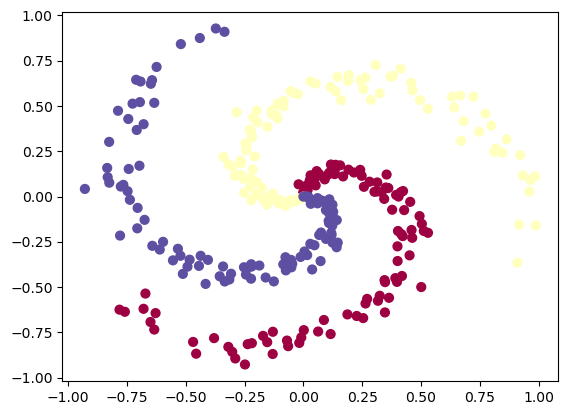

[[0.33333333 0.33333333 0.33333333]
 [0.33333219 0.33333375 0.33333406]
 [0.33333109 0.33333413 0.33333477]
 [0.33332984 0.33333465 0.33333551]
 [0.33332885 0.33333517 0.33333598]]
loss: 1.0985953300284093
y shpae:  (300,)


In [6]:
import matplotlib.pyplot as plt
import numpy as np

def spiral_data(samples=100, classes=3):
    N = samples # number of points per class
    D = 2 # dimensionality
    K = classes # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
        
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    return X, y

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
   
    def forward(self, inputs):   
        self.output = np.maximum(0, inputs)
        
class Activation_Softmax:
    
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

class Loss:

    def calculate(self, output, y):    
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
      
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true,axis=1)
        
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
    
    
## x 입력할 값, y는 실제 값
# softmax 함수로 hiden layer을 바로 하나로 출력하게끔
# 실제 y 와 출력층에서 나온 y' 와 비교해야 함 => 진짜 같은지?
# 이럴 때 필요한게 LOSS 함수임 => 비교 값이 
# Loss_CategoricalCrossEntropy 로 맞는지 확인-> 0에 가까울 수록 정확함
# 나중엔 learning rate로 weight값을 조절해 학습을 반복시킴
    
X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
    
activation2 = Activation_Softmax()
loss_function = Loss_CategoricalCrossentropy()
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print(activation2.output[:5])

loss = loss_function.calculate(activation2.output, y)
print('loss:', loss)
print('y shpae: ', y.shape)

## 시험 데이터로 평가하기